# 📁 03_segmentation_rfm.ipynb

# ## 1. Introduction
"""
Cluster customers based on RFM and telco usage patterns.
Goal: Identify distinct customer personas for better targeting.
"""

In [1]:
# ## 2. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# ## 3. Load Dataset
df = pd.read_csv("segmentation_customers.csv")
df.head()

,customer_id,recency_days,frequency,monetary_value,avg_call_duration_min,num_support_tickets,data_usage_gb,app_opens_weekly
0,CUST0000,52,5,316.32,2.28,2,2.33,14
1,CUST0001,93,4,258.18,1.39,1,5.15,17
2,CUST0002,15,3,506.66,4.23,0,0.83,11
3,CUST0003,72,4,338.62,5.47,1,1.40,0
4,CUST0004,61,1,143.94,10.60,1,1.24,6


In [4]:
# ## 4. Preprocessing
features = df.drop(columns=['customer_id'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [5]:
# ## 5. KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


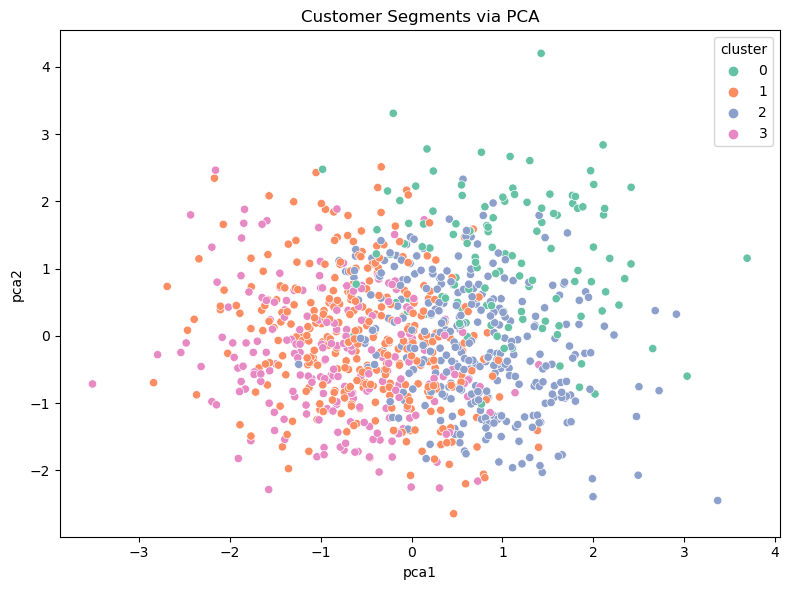

In [7]:
# ## 6. PCA for Visualization
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X_scaled)
df['pca1'] = pca_coords[:, 0]
df['pca2'] = pca_coords[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set2')
plt.title("Customer Segments via PCA")
plt.tight_layout()
plt.show()

In [8]:
# ## 7. Segment Summary
summary = df.groupby('cluster').mean(numeric_only=True)
print(summary)

         recency_days  frequency  monetary_value  avg_call_duration_min  \
cluster                                                                   
0           41.423729   5.542373      309.652203               5.420085   
1           75.729970   4.857567      278.872908               5.307033   
2           24.214724   4.917178      338.340552               4.790859   
3           51.401826   4.840183      280.312100               4.691005   

         num_support_tickets  data_usage_gb  app_opens_weekly      pca1  \
cluster                                                                   
0                   1.118644       5.996780          8.355932  1.046825   
1                   0.721068       1.720059         11.267062 -0.519741   
2                   0.693252       1.364755          9.266871  0.705279   
3                   2.703196       1.412009          9.000000 -0.814126   

             pca2  
cluster            
0        1.155829  
1       -0.036386  
2       -0.164688 

# ## 8. Business Insight
"""
Each cluster represents a unique segment based on behavior:
- Segment 0: Low usage, infrequent app use — re-engagement opportunity.
- Segment 1: High value and app opens — loyal users, great for referral campaigns.
- Segment 2: High support tickets and low spend — consider service improvement.
- Segment 3: Heavy users across features — potential upsell candidates.
"""